In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dinak\AppData\Local\Temp\ipykernel_4996\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 1. Import required libraries and read the dataset.

df = pd.read_csv('Apps_data+(1).csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

print(df.head(10))
print(df.info())
print(df.shape)
print(df.describe())
print(df.tail(10))

In [3]:
# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

summary_data =df.describe()
print(summary_data)

# missing values
print('\n')
missing_value = df.isnull().sum()
print('Missing values:\n',missing_value)


            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


Missing values:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:
# 4. Check if there are any duplicate records in the dataset? if any drop them.
df.drop(columns = ['Type'], inplace = True)

In [6]:
# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

df[['Type']].nunique()


Type    3
dtype: int64

In [ ]:
# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
# column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

missing_values = df['Rating'].isnull().sum()
print('missing_values:\n',missing_values)
df.dropna(subset=['Rating'], inplace=True)
df['Rating_category'] = df['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')
print(df['Rating_category'].head(10))

In [ ]:
# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

df['Rating_category'].value_counts()

<Figure size 500x500 with 0 Axes>

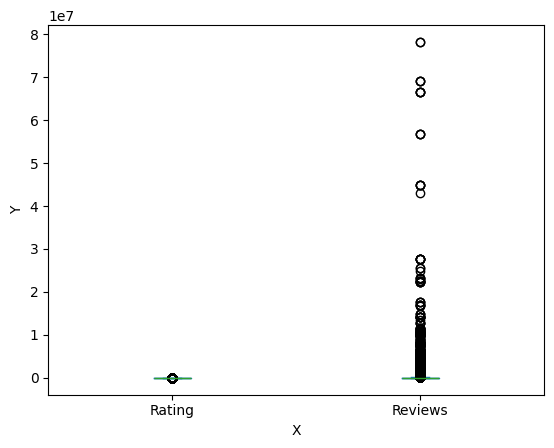

In [7]:
# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
# handle the outliers using a transformation approach.(Hint: Use log transformation)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

Q1 = df['Reviews'].quantile(0.25)
Q2 = df['Reviews'].quantile(0.5)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1

# outliers
LWB = Q3 - 1.5*IQR
UWB = Q1 + 1.5*IQR
outliers = df[(df['Reviews'] < LWB) | (df['Reviews'] > UWB)]

# Visullaition
plt.figure(figsize = (5,5))
df.plot( kind = 'box')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
# suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
# size='Varies with device')

df['Size'] = df['Size'].replace({'M': 'e6', 'K': 'e3'}, regex=True)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size']

In [ ]:
# 10. Check the column 'Installs',  treat the unwanted characters and convert the column into a suitable data type.
df['Installs'] = df['Installs'].replace(',','').replace('+','')
df['Installs'] = pd.to_numeric(df['Installs'])
df['Installs'].dtypes

In [ ]:
# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

df['Price'] = df['Price'].replace

In [ ]:
# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
# created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
# 'Current Ver','Android Ver' columns since which are redundant for our analysis

df_redundant = ['Rating', 'App', 'Rating', 'Genres', 'Last Updated','Current Ver', 'Android Ver']
df.drop(columns = df_redundant, inplace =False)

In [ ]:
# 13.Encode the categorical columns.

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
catcols = df.select_dtypes(include = 'object').columns
print(catcols)
oe.fit(df[catcols])
catcols = pd.DataFrame(oe.transform(df[catcols]))
catcols


In [ ]:
# 14.Segregate the target and independent features (Hint: Use Rating_category as the target)

target = df['Rating']
independent_features = df.drop(columns=['Rating'])

# Displaying the segregated data
print("Target:")
print(target)
print("\nIndependent Features:")
print(independent_features)

In [ ]:
# 15. Split the dataset into train and test

from sklearn.model_selection import train_test_split
x = df[['Rating',	'Reviews','Size']]
y = df[['Category']]
X_train, X_test, y_train, y_test =train_test_split(x,y, random_state =555)


In [ ]:
# 16. Standardize the data, so that the values are within a particular range

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train_st = st.fit_transform(X_train)
X_test_st = st.fit_transform(X_test)
